In [1]:
library(WRS2)
library(tidyverse)
library(effsize)
library(rogme)
library(gridExtra)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rogme’


The following object is masked from ‘package:WRS2’:

    pb2gen



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [2]:
df<-read.csv('df_acc_hw.csv')

df$Session<-recode_factor(df$Session, '1'='pre', '2'='post' )
df$Subject<-factor(df$Subject)
df$Session<-factor(df$Session)

In [3]:
df

X,Group,Session,Subject,accuracy
<int>,<fct>,<fct>,<fct>,<dbl>
0,ctr,pre,172,94.14634
1,ctr,pre,185,100.00000
2,ctr,pre,271,96.58537
3,ctr,pre,279,99.51220
4,ctr,pre,295,93.65854
5,ctr,pre,339,98.53659
6,ctr,pre,388,99.02439
7,ctr,pre,428,94.14634
8,ctr,pre,429,100.00000


In [4]:
# robust mixed design anova (2 samples repeated measures)
bwtrim(accuracy~Group*Session, id=Subject, data=df)

Call:
bwtrim(formula = accuracy ~ Group * Session, id = Subject, data = df)

               value df1     df2 p.value
Group         0.0250   1 25.5500  0.8756
Session       1.5338   1 23.0158  0.2280
Group:Session 0.0704   1 23.0158  0.7931


There is no effect of group or session or interaction on accuracy to HW as Go stim

In [5]:
df_pre<-df %>% filter(Session=='pre')
df_post<-df %>% filter(Session=='post')

df_int<-df %>% filter(Group=='int')
df_ctr<-df %>% filter(Group=='ctr')


Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown par

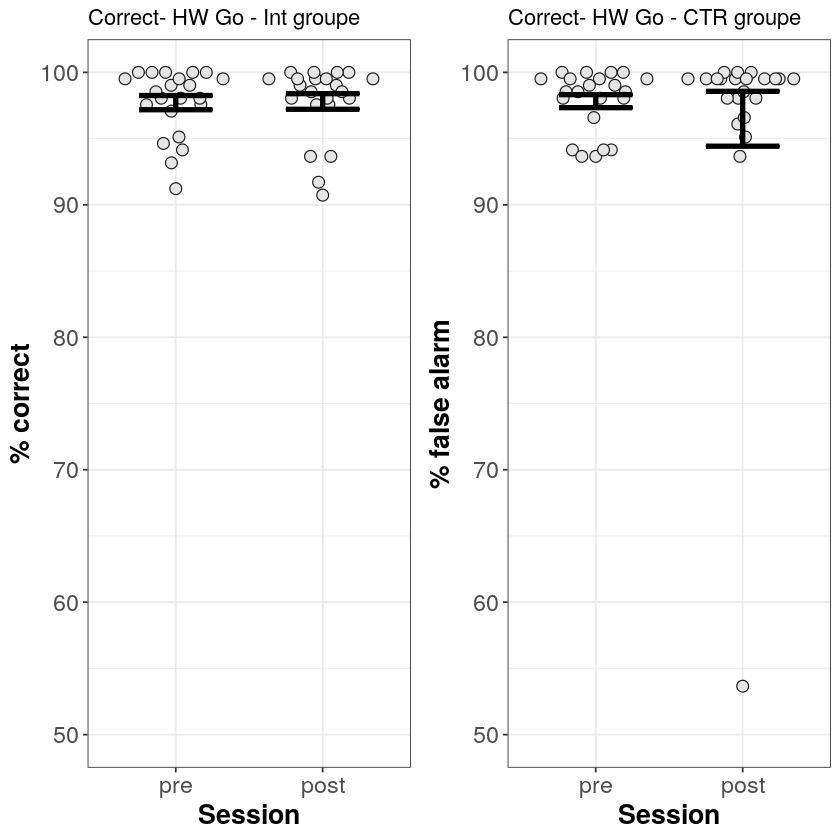

In [8]:
ps1<-plot_scat2(df_int, 
               formula=accuracy~Session,
               ylabel=" % correct ", 
                alpha = 1,
                shape = 21,
                colour = "grey10",
                fill = "grey90",
                size = 3)+
    scale_y_continuous(limits = c(50, 100))
              
              
#ps1<-ps1+coord_flip()
strip1 <- plot_hd_bars(ps1, 
                     col="black", 
                    q_size = 0.5,
                      md_size = 1.5,
                      alpha = 1)


strip1<-strip1+ggtitle('Correct- HW Go - Int groupe')

ps2<-plot_scat2(df_ctr, 
               formula=accuracy~Session,
               ylabel="% false alarm", 
               alpha = 1,
                shape = 21,
                colour = "grey10",
                fill = "grey90",
                size = 3)+
    scale_y_continuous(limits = c(50, 100))

              

strip2 <- plot_hd_bars(ps2, 
                     col="black", 
                    q_size = 0.5,
                      md_size = 1.5,
                      alpha = 1)

#ps2<-ps2+strip2
strip2<- strip2+ggtitle('Correct- HW Go - CTR groupe')


grid.arrange(strip1, strip2, ncol=2)
            

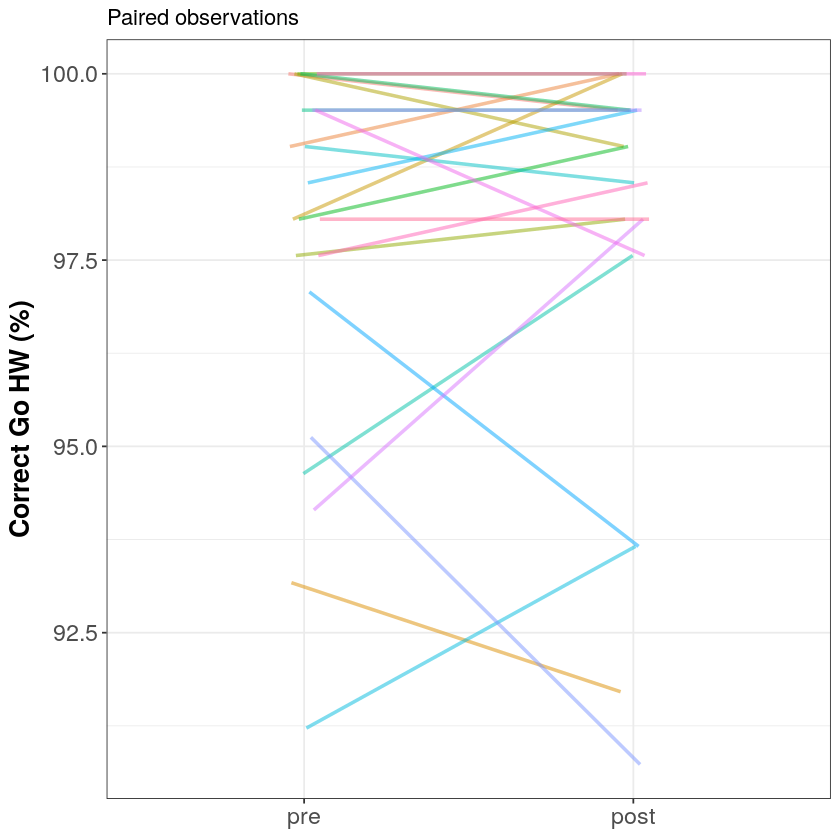

In [10]:
pd <- position_dodge(width = 0.1)
linkedstrip_int <- ggplot(df_int, aes(x=Session, y=accuracy, group=Subject)) +
                geom_line(aes(colour=Subject),size=1, alpha=.5,
                          position=pd) +
                theme_bw() +
                theme(axis.text.x = element_text(size=14),
                      axis.text.y = element_text(size=14),
                      axis.title.x = element_blank(),
                      axis.title.y = element_text(size=16,face="bold"),
                      legend.position="none") +
                  labs(title="Paired observations") +
                ylab("Correct Go HW (%)") #+
                #scale_x_discrete(labels = c("pre" = "Pre-test","condition2" = "Condition 2")) +
                #scale_y_continuous(limits=c(0, 50),breaks=seq(0,50,5))
linkedstrip_int

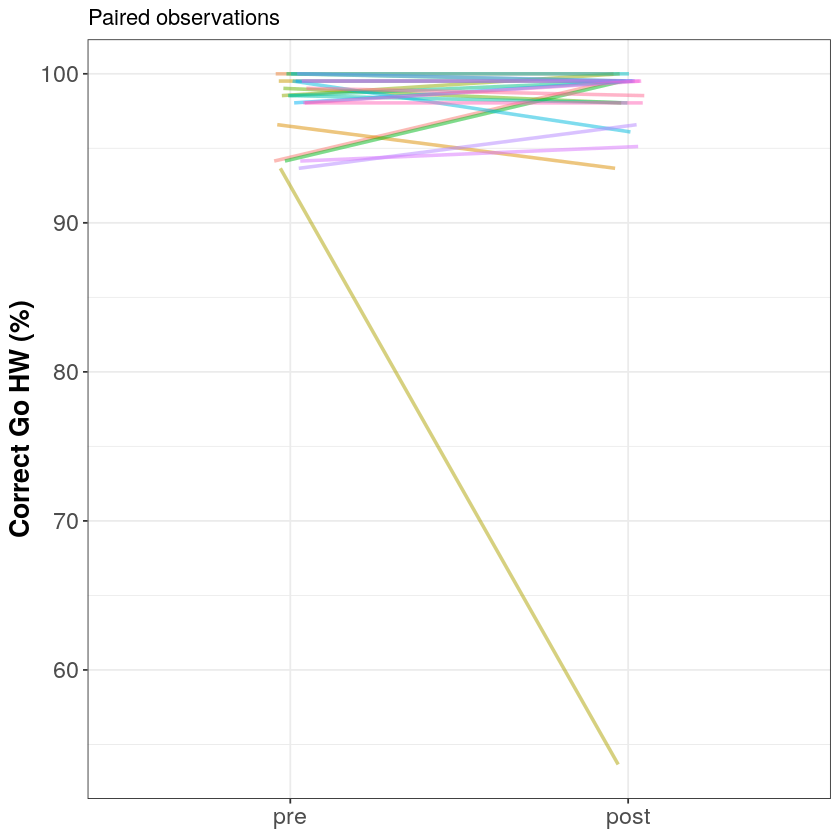

In [12]:
pd <- position_dodge(width = 0.1)
linkedstrip_ctr <- ggplot(df_ctr, aes(x=Session, y=accuracy, group=Subject)) +
                geom_line(aes(colour=Subject),size=1, alpha=.5,
                          position=pd) +
                theme_bw() +
                theme(axis.text.x = element_text(size=14),
                      axis.text.y = element_text(size=14),
                      axis.title.x = element_blank(),
                      axis.title.y = element_text(size=16,face="bold"),
                      legend.position="none") +
                 labs(title="Paired observations") +
                ylab("Correct Go HW (%)") #+
                #scale_x_discrete(labels = c("pre" = "Pre-test","condition2" = "Condition 2")) +
                #scale_y_continuous(limits=c(0, 50),breaks=seq(0,50,5))
linkedstrip_ctr